In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Project Maps

In [2]:
smoker_data = pd.read_csv('brfss_discos/smoker_by_state_2011_2022.csv')
smoker_data.head()

,Year,State,smoke_pct,dont_smoke_pct
0,2011,AK,22.9,77.0
1,2011,AL,24.4,75.7
2,2011,AR,26.9,73.1
3,2011,AZ,19.3,80.8
4,2011,CA,13.6,86.4


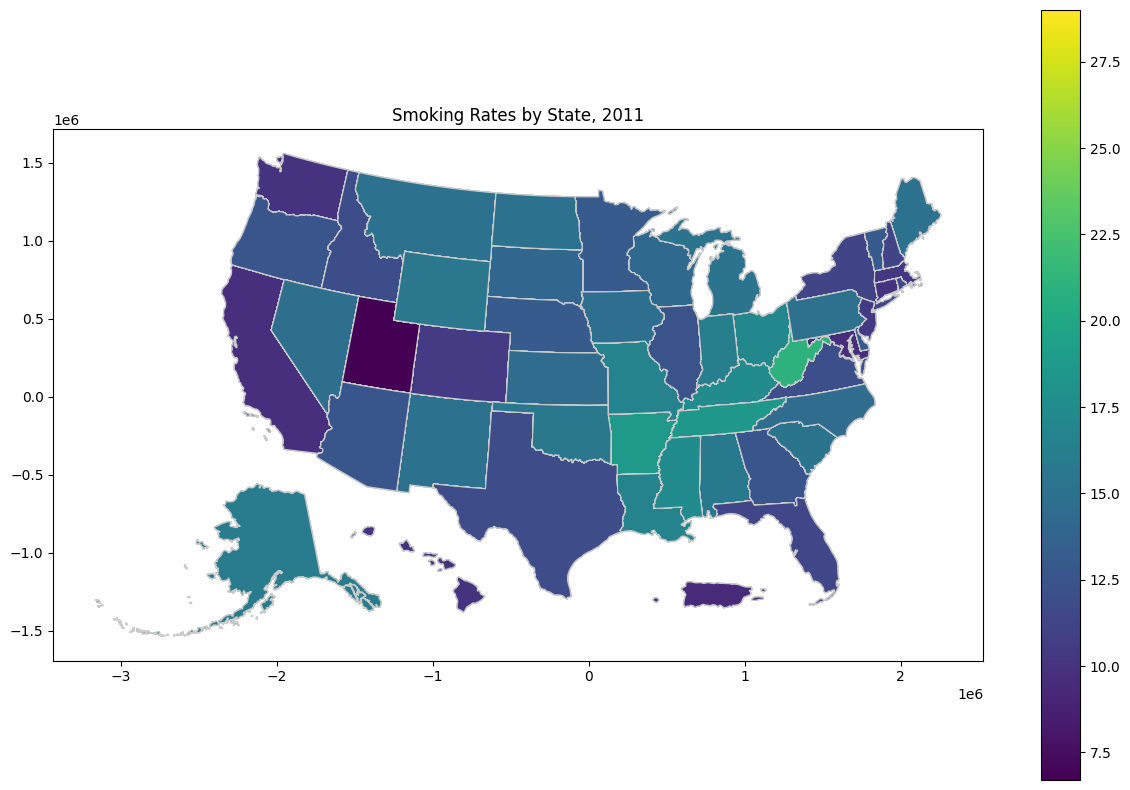

In [8]:
import pandas as pd
from pygris import states
from pygris.utils import shift_geometry
from matplotlib import pyplot as plt

# Fetch state geometries
us_states = states(cb=True, resolution="20m", cache=True, year=2019)
us_states_rescaled = shift_geometry(us_states)

# Merge state geometries with smoker data
us_states_merged = us_states_rescaled.set_index('STUSPS').join(smoker_data.set_index('State'))

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
us_states_merged.plot(
    column="smoke_pct",
    cmap="viridis",
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)
plt.title("Smoking Rates by State, 2011")
plt.show()


In [3]:
int_access_data = pd.read_csv('acs_discos/internet_access_test.csv')
int_access_data.head()

,state,total_population,total_surveyed,no_access,limited_access,pct_no_access,pct_limited_access,internet_access2,internet_access3,internet_access4,internet_access5,internet_access6,internet_access7,internet_access8,internet_access9,internet_access10,internet_access11,internet_access12,state_fips
0,Alabama,5028092,1933150,255887,72257,0.132368,0.037378,1625807,6090,1619717,1478948,294713,1221985,115813,170518,14711,1390,51456,1
1,Alaska,734821,264376,21866,7457,0.082708,0.028206,236875,610,236265,218244,43239,182105,15864,15342,1212,205,5635,2
2,Arizona,7172282,2739136,227786,88377,0.083160,0.032265,2448838,5550,2443288,2226250,294043,2027802,180307,226635,20315,1970,62512,4
3,Arkansas,3018669,1171694,167209,47540,0.142707,0.040574,968272,2584,965688,883988,188601,706838,67684,98526,8743,641,36213,5
4,California,39356104,13315822,856041,341118,0.064288,0.025617,12195945,18361,12177584,11390547,1370203,10310555,671760,1084864,58921,8022,263836,6


In [10]:
state_abbr2 = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}


# Map state FIPS codes to state names
int_access_data['state_abbr'] = int_access_data['state'].map(state_abbr2)
int_access_data.head()

,state,total_population,total_surveyed,no_access,limited_access,pct_no_access,pct_limited_access,internet_access2,internet_access3,internet_access4,internet_access5,internet_access6,internet_access7,internet_access8,internet_access9,internet_access10,internet_access11,internet_access12,state_fips,state_abbr
0,Alabama,5028092,1933150,255887,72257,0.132368,0.037378,1625807,6090,1619717,1478948,294713,1221985,115813,170518,14711,1390,51456,1,AL
1,Alaska,734821,264376,21866,7457,0.082708,0.028206,236875,610,236265,218244,43239,182105,15864,15342,1212,205,5635,2,AK
2,Arizona,7172282,2739136,227786,88377,0.083160,0.032265,2448838,5550,2443288,2226250,294043,2027802,180307,226635,20315,1970,62512,4,AZ
3,Arkansas,3018669,1171694,167209,47540,0.142707,0.040574,968272,2584,965688,883988,188601,706838,67684,98526,8743,641,36213,5,AR
4,California,39356104,13315822,856041,341118,0.064288,0.025617,12195945,18361,12177584,11390547,1370203,10310555,671760,1084864,58921,8022,263836,6,CA


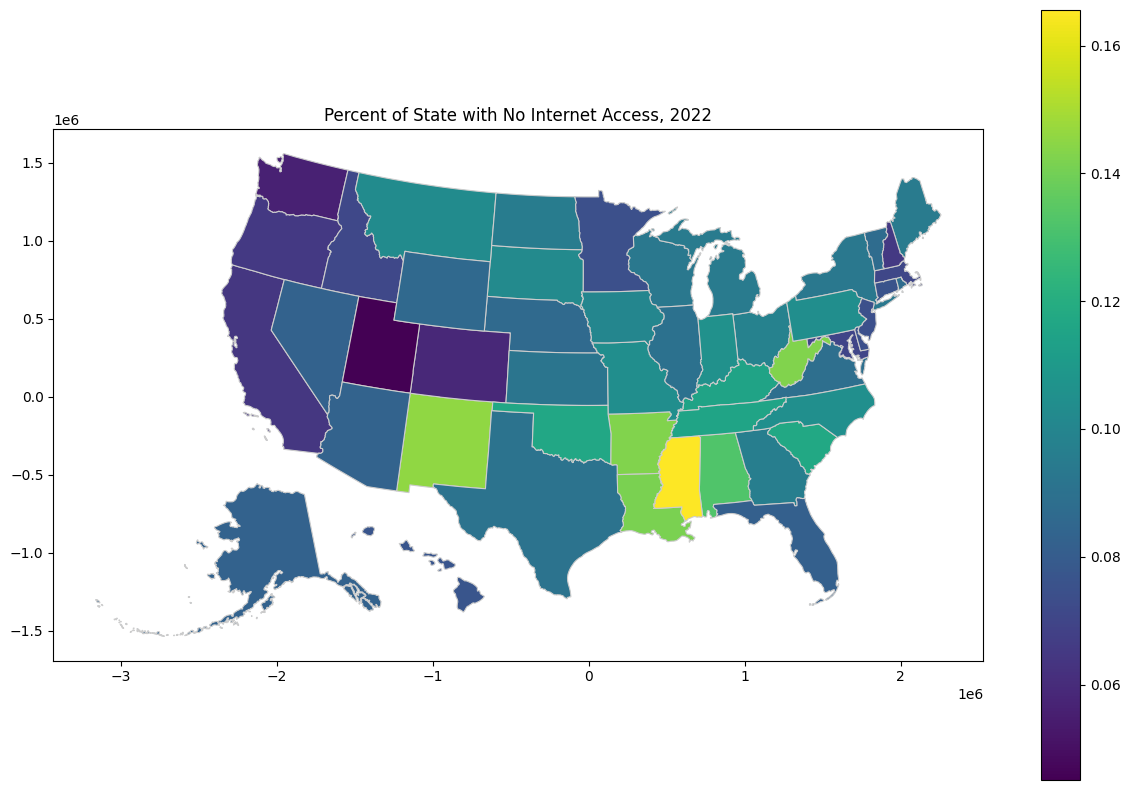

In [12]:
# Merge state geometries with smoker data
us_states_merged2 = us_states_rescaled.set_index('STUSPS').join(int_access_data.set_index('state_abbr'))

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
us_states_merged2.plot(
    column="pct_no_access",
    cmap="viridis",
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)
plt.title("Percent of State with No Internet Access, 2022")
plt.show()

In [16]:
combined_data = smoker_data[smoker_data['Year'] == 2022].merge(int_access_data, how='left', left_on='State', right_on='state_abbr')
combined_data.head()

,Year,State,smoke_pct,dont_smoke_pct,state,total_population,total_surveyed,no_access,limited_access,pct_no_access,...,internet_access5,internet_access6,internet_access7,internet_access8,internet_access9,internet_access10,internet_access11,internet_access12,state_fips,state_abbr
0,2022,AK,16.0,84.1,Alaska,734821.0,264376.0,21866.0,7457.0,0.082708,...,218244.0,43239.0,182105.0,15864.0,15342.0,1212.0,205.0,5635.0,2.0,AK
1,2022,AL,15.7,84.4,Alabama,5028092.0,1933150.0,255887.0,72257.0,0.132368,...,1478948.0,294713.0,1221985.0,115813.0,170518.0,14711.0,1390.0,51456.0,1.0,AL
2,2022,AR,18.7,81.2,Arkansas,3018669.0,1171694.0,167209.0,47540.0,0.142707,...,883988.0,188601.0,706838.0,67684.0,98526.0,8743.0,641.0,36213.0,5.0,AR
3,2022,AZ,12.7,87.3,Arizona,7172282.0,2739136.0,227786.0,88377.0,0.083160,...,2226250.0,294043.0,2027802.0,180307.0,226635.0,20315.0,1970.0,62512.0,4.0,AZ
4,2022,CA,9.7,90.2,California,39356104.0,13315822.0,856041.0,341118.0,0.064288,...,11390547.0,1370203.0,10310555.0,671760.0,1084864.0,58921.0,8022.0,263836.0,6.0,CA


In [40]:
combined_data['pct_no_access'] = combined_data['pct_no_access'] * 100

In [41]:
# Calculate statistics for smoking rates
smoke_stats = combined_data['smoke_pct'].describe()
print("Smoking Rate Statistics:")
print(smoke_stats)

# Calculate statistics for no internet access rates
no_access_stats = combined_data['pct_no_access'].describe()
print("\nNo Internet Access Rate Statistics:")
print(no_access_stats)

# Specific statistics
max_smoke = combined_data['smoke_pct'].max()
min_smoke = combined_data['smoke_pct'].min()
max_no_access = combined_data['pct_no_access'].max()
min_no_access = combined_data['pct_no_access'].min()

print(f"\nMax Smoking Rate: {max_smoke}")
print(f"Min Smoking Rate: {min_smoke}")
print(f"Max No Internet Access Rate: {max_no_access}")
print(f"Min No Internet Access Rate: {min_no_access}")

Smoking Rate Statistics:
count    55.000000
mean     13.685455
std       2.912706
min       6.700000
25%      11.550000
50%      13.700000
75%      15.400000
max      21.000000
Name: smoke_pct, dtype: float64

No Internet Access Rate Statistics:
count    51.000000
mean      9.384872
std       2.485126
min       4.506694
25%       7.639044
50%       9.073754
75%      10.394743
max      16.557311
Name: pct_no_access, dtype: float64

Max Smoking Rate: 21.0
Min Smoking Rate: 6.7
Max No Internet Access Rate: 16.5573114034188
Min No Internet Access Rate: 4.506693990227871


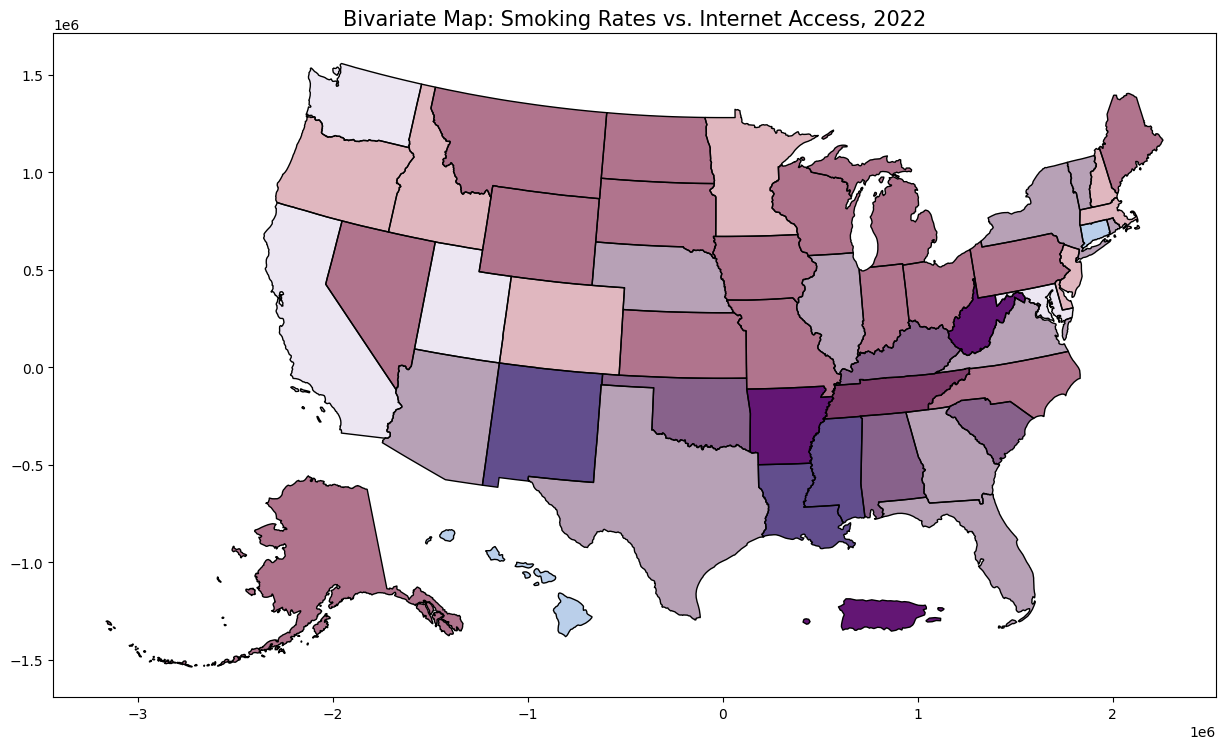

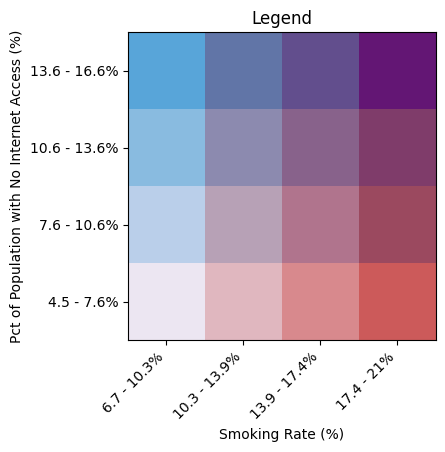

In [47]:
import numpy as np

# Merge data with the geometries
states_data = us_states_rescaled.set_index('STUSPS').join(combined_data.set_index('state_abbr'))

# Custom quantization boundaries
smoke_bins = [min_smoke, 10.275, 13.85, 17.425, max_smoke]
no_access_bins = [min_no_access, 7.6, 10.6, 13.6, max_no_access]

# Function to quantize based on custom boundaries
def custom_quantize(value, bins):
    return min(np.digitize(value, bins) - 1, len(bins) - 2)

states_data['smoke_pct_quant'] = states_data['smoke_pct'].apply(lambda x: custom_quantize(x, smoke_bins))
states_data['pct_no_access_quant'] = states_data['pct_no_access'].apply(lambda x: custom_quantize(x, no_access_bins))

# Create a custom 4x4 color matrix for bivariate colors
color_matrix = np.array([
    ["#ece6f2", "#bacfea", "#89bbe0", "#58a5d9"],
    ["#e0b7bf", "#b7a1b6", "#8c8aaf", "#6175a7"],
    ["#d8898d", "#b0748d", "#88628b", "#624e8d"],
    ["#cc5a5a", "#9b495f", "#7f3c6a", "#631674"]
])

# Create bivariate color data with the new quantization
def bivariate_color_custom(row):
    if pd.isnull(row['smoke_pct_quant']) or pd.isnull(row['pct_no_access_quant']):
        return '#ffffff'  # White for missing data
    return color_matrix[row['smoke_pct_quant'], row['pct_no_access_quant']]

states_data['bivariate_color'] = states_data.apply(bivariate_color_custom, axis=1)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot state boundaries
states_data.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
# Plot bivariate colors
states_data.plot(ax=ax, color=states_data['bivariate_color'])

# Add titles
plt.title('Bivariate Map: Smoking Rates vs. Internet Access, 2022', fontsize=15)

# Save the map
plt.savefig("bivariate_choropleth_map.png")

# Create custom legend
# Define the steps for the legend (4x4 grid)
legend = plt.figure(figsize=(4, 4))
legend_ax = legend.add_subplot(111)

for i in range(4):
    for j in range(4):
        legend_color = color_matrix[i, j]
        legend_ax.add_patch(plt.Rectangle((i, j), 1, 1, facecolor=legend_color))

legend_ax.set_xticks([0.5, 1.5, 2.5, 3.5])
legend_ax.set_yticks([0.5, 1.5, 2.5, 3.5])
legend_ax.set_xticklabels(['6.7 - 10.3%', '10.3 - 13.9%', '13.9 - 17.4%', '17.4 - 21%'], rotation=45, ha='right')
legend_ax.set_yticklabels(['4.5 - 7.6%', '7.6 - 10.6%', '10.6 - 13.6%', '13.6 - 16.6%'])

legend_ax.set_xlim(0, 4)
legend_ax.set_ylim(0, 4)
legend_ax.set_aspect('equal')
legend_ax.set_xlabel('Smoking Rate (%)')
legend_ax.set_ylabel('Pct of Population with No Internet Access (%)')
legend_ax.set_title('Legend', fontsize=12)

# Save the legend
legend.savefig("bivariate_choropleth_legend.png")

plt.show()

## Health Insurance:

In [50]:
health_insurance_data = pd.read_csv('acs_discos/health_insurance_data.csv')
health_insurance_data.head()

,state,total_population,total_surveyed,no_coverage_total,no_coverage_pct,hi2,hi3,hi4,hi5,hi6,...,hi57,hi58,hi59,hi60,hi61,hi62,hi63,hi64,hi65,hi66
0,Alabama,5028092,4944981,472079,0.095466,1184371,1067177,507739,53318,3914,...,588,569796,595,156010,138981,64563,253,17289,192105,3672
1,Alaska,734821,706392,82562,0.116878,187929,149902,71655,5696,587,...,175,66092,103,25911,7074,9167,137,3350,20350,996
2,Arizona,7172282,7060320,759133,0.107521,1693683,1436967,774436,86192,3555,...,617,783165,1538,170539,247853,96009,154,38292,228780,10585
3,Arkansas,3018669,2964272,261691,0.088282,739851,657783,269117,30994,1764,...,661,322365,160,59043,105129,40336,59,19419,98219,2293
4,California,39356104,38874540,2752067,0.070794,9326787,8373533,4226893,541730,30274,...,4383,3564976,7485,1001131,775466,887132,816,101706,791240,63206


In [51]:
# Map state FIPS codes to state names
health_insurance_data['state_abbr'] = health_insurance_data['state'].map(state_abbr2)
health_insurance_data['no_coverage_pct'] = health_insurance_data['no_coverage_pct'] * 100
health_insurance_data.head()

,state,total_population,total_surveyed,no_coverage_total,no_coverage_pct,hi2,hi3,hi4,hi5,hi6,...,hi58,hi59,hi60,hi61,hi62,hi63,hi64,hi65,hi66,state_abbr
0,Alabama,5028092,4944981,472079,9.546629,1184371,1067177,507739,53318,3914,...,569796,595,156010,138981,64563,253,17289,192105,3672,AL
1,Alaska,734821,706392,82562,11.687845,187929,149902,71655,5696,587,...,66092,103,25911,7074,9167,137,3350,20350,996,AK
2,Arizona,7172282,7060320,759133,10.752105,1693683,1436967,774436,86192,3555,...,783165,1538,170539,247853,96009,154,38292,228780,10585,AZ
3,Arkansas,3018669,2964272,261691,8.828171,739851,657783,269117,30994,1764,...,322365,160,59043,105129,40336,59,19419,98219,2293,AR
4,California,39356104,38874540,2752067,7.079356,9326787,8373533,4226893,541730,30274,...,3564976,7485,1001131,775466,887132,816,101706,791240,63206,CA


In [53]:
combined_data = smoker_data[smoker_data['Year'] == 2022].merge(health_insurance_data, how='left', left_on='State', right_on='state_abbr')
combined_data.head()

,Year,State,smoke_pct,dont_smoke_pct,state,total_population,total_surveyed,no_coverage_total,no_coverage_pct,hi2,...,hi58,hi59,hi60,hi61,hi62,hi63,hi64,hi65,hi66,state_abbr
0,2022,AK,16.0,84.1,Alaska,734821.0,706392.0,82562.0,11.687845,187929.0,...,66092.0,103.0,25911.0,7074.0,9167.0,137.0,3350.0,20350.0,996.0,AK
1,2022,AL,15.7,84.4,Alabama,5028092.0,4944981.0,472079.0,9.546629,1184371.0,...,569796.0,595.0,156010.0,138981.0,64563.0,253.0,17289.0,192105.0,3672.0,AL
2,2022,AR,18.7,81.2,Arkansas,3018669.0,2964272.0,261691.0,8.828171,739851.0,...,322365.0,160.0,59043.0,105129.0,40336.0,59.0,19419.0,98219.0,2293.0,AR
3,2022,AZ,12.7,87.3,Arizona,7172282.0,7060320.0,759133.0,10.752105,1693683.0,...,783165.0,1538.0,170539.0,247853.0,96009.0,154.0,38292.0,228780.0,10585.0,AZ
4,2022,CA,9.7,90.2,California,39356104.0,38874540.0,2752067.0,7.079356,9326787.0,...,3564976.0,7485.0,1001131.0,775466.0,887132.0,816.0,101706.0,791240.0,63206.0,CA


In [57]:
# Calculate statistics for smoking rates
smoke_stats = combined_data['smoke_pct'].describe()
print("Smoking Rate Statistics:")
print(smoke_stats)

# Calculate statistics for no internet access rates
no_coverage_stats = combined_data['no_coverage_pct'].describe()
print("\nNo HI Rate Statistics:")
print(no_coverage_stats)

# # Specific statistics
# max_smoke = combined_data['smoke_pct'].max()
# min_smoke = combined_data['smoke_pct'].min()
max_no_coverage = combined_data['no_coverage_pct'].max()
min_no_coverage = combined_data['no_coverage_pct'].min()

# print(f"\nMax Smoking Rate: {max_smoke}")
# print(f"Min Smoking Rate: {min_smoke}")
print(f"Max No Coverage Rate: {max_no_coverage}")
print(f"Min No Coverage Rate: {min_no_coverage}")

Smoking Rate Statistics:
count    55.000000
mean     13.685455
std       2.912706
min       6.700000
25%      11.550000
50%      13.700000
75%      15.400000
max      21.000000
Name: smoke_pct, dtype: float64

No HI Rate Statistics:
count    51.000000
mean      7.962009
std       2.978768
min       2.687022
25%       5.823289
50%       7.489461
75%       9.641743
max      17.577307
Name: no_coverage_pct, dtype: float64
Max No Coverage Rate: 17.57730656501974
Min No Coverage Rate: 2.68702212843453


In [102]:
def create_bivariate_choropleth(combined_data, column1, column2, quant_bins1, quant_bins2, color_matrix, year=2022, map_title='Bivariate Choropleth Map', legend_title='Legend'):
    # Fetch and process state geometries
    us_states = states(cb=True, resolution="20m", cache=True, year=year)
    us_states_rescaled = shift_geometry(us_states)
    
    # Merge data with the geometries
    states_data = us_states_rescaled.set_index('STUSPS').join(combined_data.set_index('state_abbr'))
    
    # Function to quantize based on custom boundaries
    def custom_quantize(value, bins):
        return min(np.digitize(value, bins) - 1, len(bins) - 2)
    
    states_data[f'{column1}_quant'] = states_data[column1].apply(lambda x: custom_quantize(x, quant_bins1))
    states_data[f'{column2}_quant'] = states_data[column2].apply(lambda x: custom_quantize(x, quant_bins2))
    
    # Create bivariate color data with the new quantization
    def bivariate_color_custom(row):
        if pd.isnull(row[f'{column1}_quant']) or pd.isnull(row[f'{column2}_quant']):
            return '#ffffff'  # White for missing data
        return color_matrix[row[f'{column1}_quant'], row[f'{column2}_quant']]
    
    states_data['bivariate_color'] = states_data.apply(bivariate_color_custom, axis=1)
    
    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    
    # Plot state boundaries
    states_data.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
    # Plot bivariate colors
    states_data.plot(ax=ax, color=states_data['bivariate_color'])
    
    # Add titles
    plt.title(f'{map_title}', fontsize=15)
    
    # Save the map
    plt.savefig("ecig_poverty_map.png")
    
    # Create custom legend
    # Define the steps for the legend (4x4 grid)
    legend = plt.figure(figsize=(4, 4))
    legend_ax = legend.add_subplot(111)
    
    for i in range(4):
        for j in range(4):
            legend_color = color_matrix[i, j]
            legend_ax.add_patch(plt.Rectangle((i, j), 1, 1, facecolor=legend_color))
    
    legend_ax.set_xticks([0.5, 1.5, 2.5, 3.5])
    legend_ax.set_yticks([0.5, 1.5, 2.5, 3.5])
    legend_ax.set_xticklabels(['3.1 - 5.4%', '5.4 - 7.6%', '7.6 - 9.9%', '9.9 - 12.1%'], rotation=45, ha='right')
    legend_ax.set_yticklabels(['7.3 - 10.3%', '10.3 - 13.3%', '13.3 - 16.3%', '16.3 - 19.2%'])
    
    legend_ax.set_xlim(0, 4)
    legend_ax.set_ylim(0, 4)
    legend_ax.set_aspect('equal')
    legend_ax.set_xlabel(column1)
    legend_ax.set_ylabel(column2)
    legend_ax.set_title(legend_title, fontsize=12)
    
    # Save the legend
    #legend.savefig("bivariate_choropleth_legend.png")
    
    plt.show()

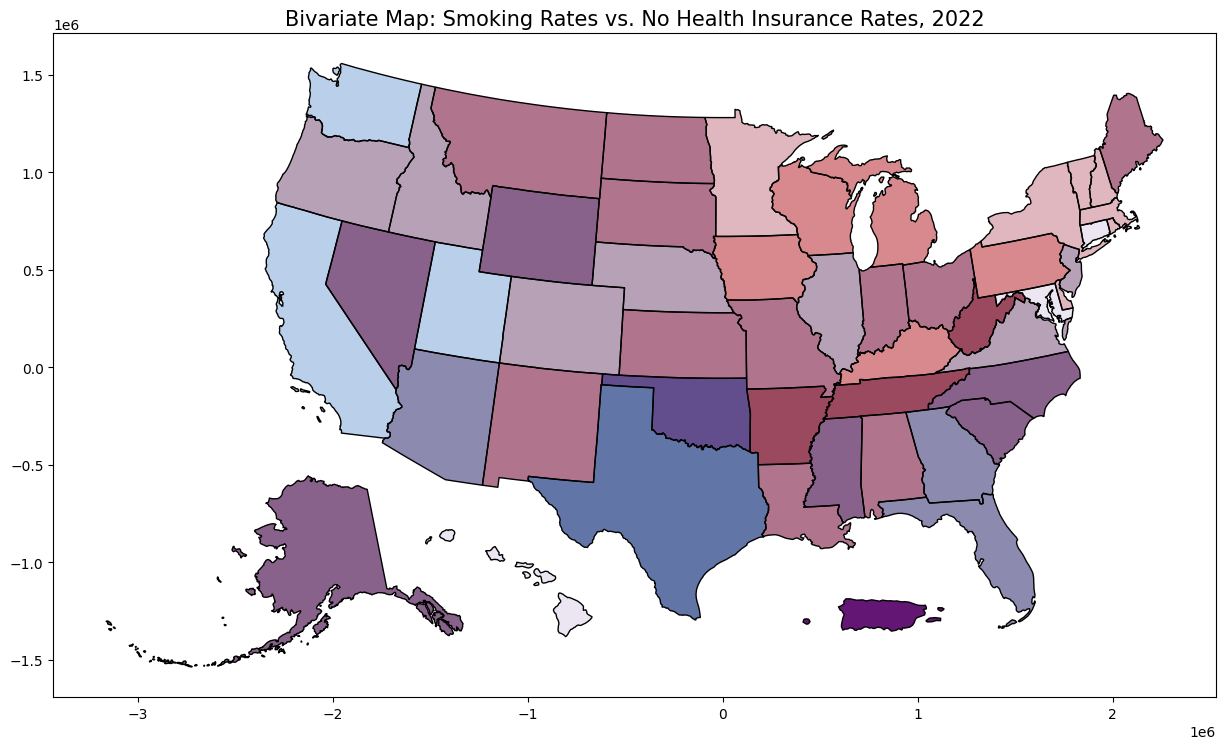

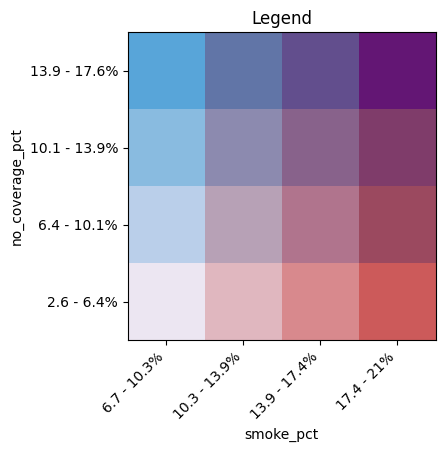

In [66]:
# Custom quantization boundaries
smoke_bins = [min_smoke, 10.275, 13.85, 17.425, max_smoke]
no_coverage_bins = [min_no_coverage, 6.35, 10.1, 13.85, max_no_coverage]

# Custom 4x4 color matrix for bivariate colors
color_matrix = np.array([
    ["#ece6f2", "#bacfea", "#89bbe0", "#58a5d9"],
    ["#e0b7bf", "#b7a1b6", "#8c8aaf", "#6175a7"],
    ["#d8898d", "#b0748d", "#88628b", "#624e8d"],
    ["#cc5a5a", "#9b495f", "#7f3c6a", "#631674"]
])

# Call the function
create_bivariate_choropleth(combined_data, 'smoke_pct', 'no_coverage_pct', smoke_bins, no_coverage_bins, color_matrix, map_title='Bivariate Map: Smoking Rates vs. No Health Insurance Rates, 2022')

## Poverty Levels

In [67]:
poverty_data = pd.read_csv('acs_discos/poverty_data.csv')

# Map state FIPS codes to state names
poverty_data['state_abbr'] = poverty_data['state'].map(state_abbr2)
poverty_data['pct_below'] = poverty_data['pct_below'] * 100
poverty_data.head()

,state,total_population,total_surveyed,below_poverty_level,pct_below,above_poverty_level,state_fips,state_abbr
0,Alabama,5028092,4890427,768897,15.722492,4121530,1,AL
1,Alaska,734821,717293,75227,10.487625,642066,2,AK
2,Arizona,7172282,7017776,916876,13.065051,6100900,4,AZ
3,Arkansas,3018669,2931377,475729,16.228858,2455648,5,AR
4,California,39356104,38643585,4685272,12.124320,33958313,6,CA


In [68]:
combined_data = smoker_data[smoker_data['Year'] == 2022].merge(poverty_data, how='left', left_on='State', right_on='state_abbr')
combined_data.head()

,Year,State,smoke_pct,dont_smoke_pct,state,total_population,total_surveyed,below_poverty_level,pct_below,above_poverty_level,state_fips,state_abbr
0,2022,AK,16.0,84.1,Alaska,734821.0,717293.0,75227.0,10.487625,642066.0,2.0,AK
1,2022,AL,15.7,84.4,Alabama,5028092.0,4890427.0,768897.0,15.722492,4121530.0,1.0,AL
2,2022,AR,18.7,81.2,Arkansas,3018669.0,2931377.0,475729.0,16.228858,2455648.0,5.0,AR
3,2022,AZ,12.7,87.3,Arizona,7172282.0,7017776.0,916876.0,13.065051,6100900.0,4.0,AZ
4,2022,CA,9.7,90.2,California,39356104.0,38643585.0,4685272.0,12.124320,33958313.0,6.0,CA


In [69]:
# Calculate statistics for smoking rates
smoke_stats = combined_data['smoke_pct'].describe()
print("Smoking Rate Statistics:")
print(smoke_stats)

# Calculate statistics for no internet access rates
poverty_stats = combined_data['pct_below'].describe()
print("\nPoverty Rate Statistics:")
print(poverty_stats)

# # Specific statistics
# max_smoke = combined_data['smoke_pct'].max()
# min_smoke = combined_data['smoke_pct'].min()
max_poverty = combined_data['pct_below'].max()
min_poverty = combined_data['pct_below'].min()

# print(f"\nMax Smoking Rate: {max_smoke}")
# print(f"Min Smoking Rate: {min_smoke}")
print(f"Max Poverty Rate: {max_poverty}")
print(f"Min Poverty Rate: {min_poverty}")

Smoking Rate Statistics:
count    55.000000
mean     13.685455
std       2.912706
min       6.700000
25%      11.550000
50%      13.700000
75%      15.400000
max      21.000000
Name: smoke_pct, dtype: float64

Poverty Rate Statistics:
count    51.000000
mean     12.354001
std       2.632808
min       7.325118
25%      10.457325
50%      11.910194
75%      13.568500
max      19.196878
Name: pct_below, dtype: float64
Max Poverty Rate: 19.196878151432458
Min Poverty Rate: 7.325117866625271


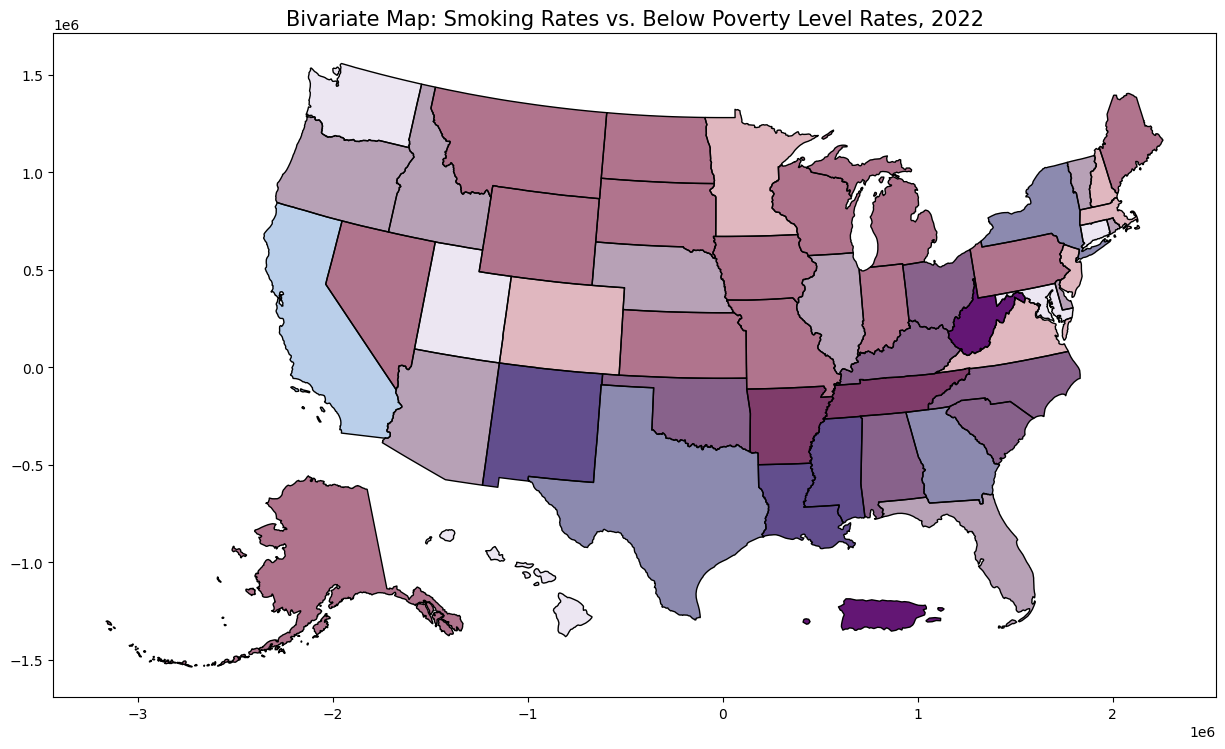

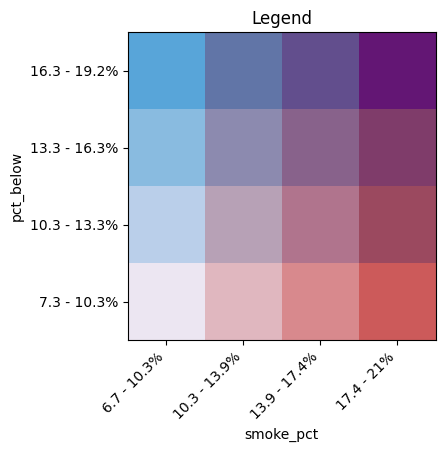

In [73]:
# Custom quantization boundaries
smoke_bins = [min_smoke, 10.275, 13.85, 17.425, max_smoke]
poverty_bins = [min_poverty, 10.3, 13.3, 16.3, max_poverty]

# Custom 4x4 color matrix for bivariate colors
color_matrix = np.array([
    ["#ece6f2", "#bacfea", "#89bbe0", "#58a5d9"],
    ["#e0b7bf", "#b7a1b6", "#8c8aaf", "#6175a7"],
    ["#d8898d", "#b0748d", "#88628b", "#624e8d"],
    ["#cc5a5a", "#9b495f", "#7f3c6a", "#631674"]
])

# Call the function
create_bivariate_choropleth(combined_data, 'smoke_pct', 'pct_below', smoke_bins, poverty_bins, color_matrix, map_title='Bivariate Map: Smoking Rates vs. Below Poverty Level Rates, 2022')

## Ecig x Internet Access

In [91]:
ecig_data = pd.read_csv('brfss_discos/ecig_by_state_2016_2017_2021_2022.csv')
ecig_data.head()

,Year,State,smoke_pct,dont_smoke_pct
0,2016,AK,4.1,95.9
1,2016,AL,5.2,94.9
2,2016,AR,5.8,94.2
3,2016,AZ,5.2,94.8
4,2016,CA,3.2,96.7


In [92]:
combined_data = ecig_data[ecig_data['Year'] == 2022].merge(int_access_data, how='left', left_on='State', right_on='state_abbr')
combined_data['pct_no_access'] = combined_data['pct_no_access'] * 100
combined_data.head()

,Year,State,smoke_pct,dont_smoke_pct,state,total_population,total_surveyed,no_access,limited_access,pct_no_access,...,internet_access5,internet_access6,internet_access7,internet_access8,internet_access9,internet_access10,internet_access11,internet_access12,state_fips,state_abbr
0,2022,AK,6.8,93.2,Alaska,734821.0,264376.0,21866.0,7457.0,8.270796,...,218244.0,43239.0,182105.0,15864.0,15342.0,1212.0,205.0,5635.0,2.0,AK
1,2022,AL,10.4,89.6,Alabama,5028092.0,1933150.0,255887.0,72257.0,13.236790,...,1478948.0,294713.0,1221985.0,115813.0,170518.0,14711.0,1390.0,51456.0,1.0,AL
2,2022,AR,10.4,89.7,Arkansas,3018669.0,1171694.0,167209.0,47540.0,14.270705,...,883988.0,188601.0,706838.0,67684.0,98526.0,8743.0,641.0,36213.0,5.0,AR
3,2022,AZ,9.0,91.0,Arizona,7172282.0,2739136.0,227786.0,88377.0,8.315980,...,2226250.0,294043.0,2027802.0,180307.0,226635.0,20315.0,1970.0,62512.0,4.0,AZ
4,2022,CA,7.2,92.8,California,39356104.0,13315822.0,856041.0,341118.0,6.428751,...,11390547.0,1370203.0,10310555.0,671760.0,1084864.0,58921.0,8022.0,263836.0,6.0,CA


In [83]:
combined_data[combined_data['State'] == 'MD']

,Year,State,smoke_pct,dont_smoke_pct,state,total_population,total_surveyed,no_access,limited_access,pct_no_access,...,internet_access5,internet_access6,internet_access7,internet_access8,internet_access9,internet_access10,internet_access11,internet_access12,state_fips,state_abbr
21,2022,MD,4.5,95.4,Maryland,6161707.0,2318124.0,161423.0,63195.0,0.069635,...,1940337.0,222185.0,1822083.0,145487.0,109005.0,5870.0,1154.0,53676.0,24.0,MD


In [94]:
# Calculate statistics for smoking rates
ecig_stats = combined_data['smoke_pct'].describe()
print("Smoking Rate Statistics:")
print(ecig_stats)

# Calculate statistics for no internet access rates
# poverty_stats = combined_data['pct_below'].describe()
# print("\nPoverty Rate Statistics:")
# print(poverty_stats)

# # Specific statistics
max_ecig = combined_data['smoke_pct'].max()
min_ecig = combined_data['smoke_pct'].min()
max_no_access = combined_data['pct_no_access'].max()
min_no_access = combined_data['pct_no_access'].min()

print(f"\nMax Ecig Rate: {max_ecig}")
print(f"Min Ecig Rate: {min_ecig}")
print(f"Max No Access Rate: {max_no_access}")
print(f"Min No Access Rate: {min_no_access}")

Smoking Rate Statistics:
count    55.000000
mean      7.750909
std       1.735455
min       3.100000
25%       6.750000
50%       7.600000
75%       8.800000
max      12.100000
Name: smoke_pct, dtype: float64

Max Ecig Rate: 12.1
Min Ecig Rate: 3.1
Max No Access Rate: 16.5573114034188
Min No Access Rate: 4.506693990227871


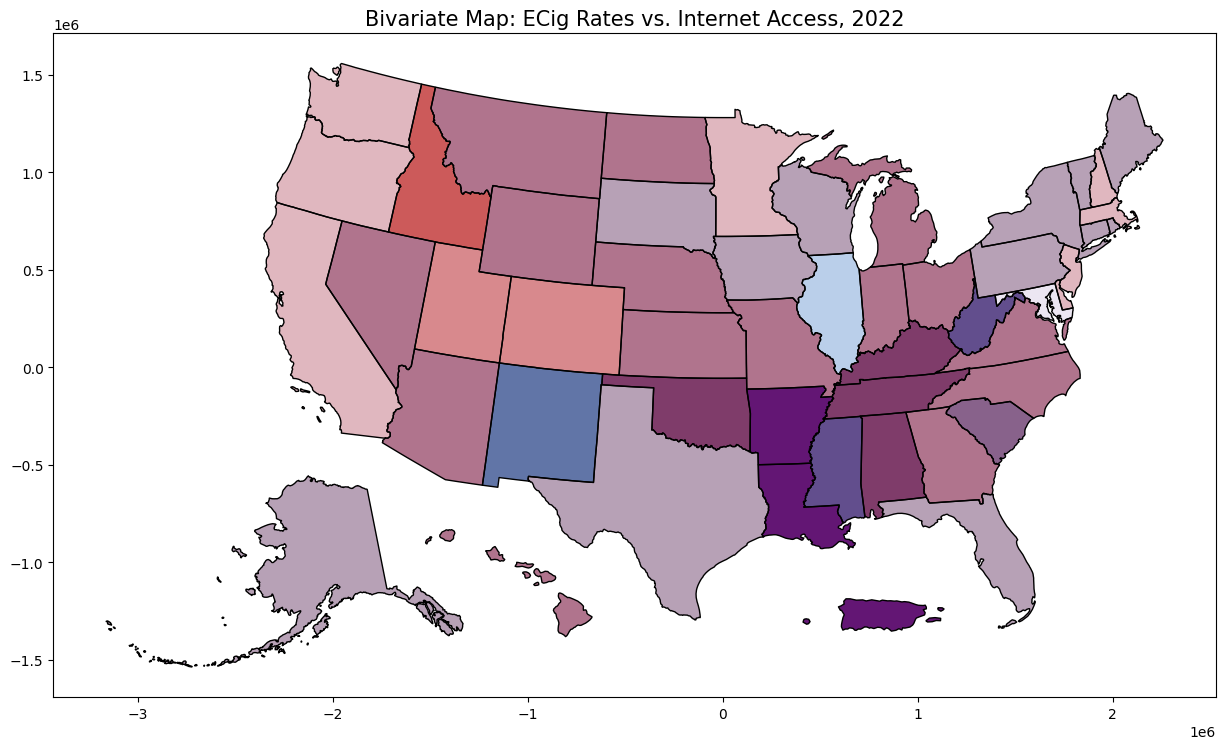

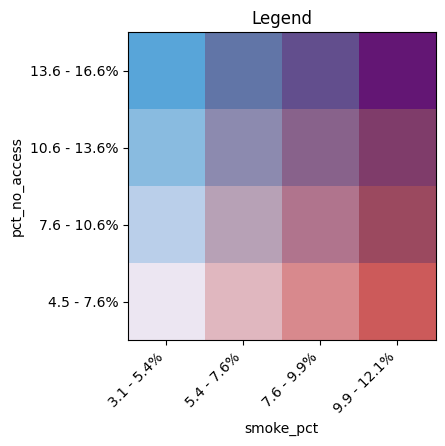

In [95]:
# Custom quantization boundaries
ecig_bins = [min_ecig, 5.35, 7.6, 9.85, max_ecig]
no_access_bins = [min_no_access, 7.6, 10.6, 13.6, max_no_access]

# Custom 4x4 color matrix for bivariate colors
color_matrix = np.array([
    ["#ece6f2", "#bacfea", "#89bbe0", "#58a5d9"],
    ["#e0b7bf", "#b7a1b6", "#8c8aaf", "#6175a7"],
    ["#d8898d", "#b0748d", "#88628b", "#624e8d"],
    ["#cc5a5a", "#9b495f", "#7f3c6a", "#631674"]
])

# Call the function
create_bivariate_choropleth(combined_data, 'smoke_pct', 'pct_no_access', ecig_bins, no_access_bins, color_matrix, map_title='Bivariate Map: ECig Rates vs. Internet Access, 2022')

## ECig x Health Insurance

In [98]:
ecig_hi_data = ecig_data[ecig_data['Year'] == 2022].merge(health_insurance_data, how='left', left_on='State', right_on='state_abbr')
ecig_hi_data.head()

,Year,State,smoke_pct,dont_smoke_pct,state,total_population,total_surveyed,no_coverage_total,no_coverage_pct,hi2,...,hi58,hi59,hi60,hi61,hi62,hi63,hi64,hi65,hi66,state_abbr
0,2022,AK,6.8,93.2,Alaska,734821.0,706392.0,82562.0,11.687845,187929.0,...,66092.0,103.0,25911.0,7074.0,9167.0,137.0,3350.0,20350.0,996.0,AK
1,2022,AL,10.4,89.6,Alabama,5028092.0,4944981.0,472079.0,9.546629,1184371.0,...,569796.0,595.0,156010.0,138981.0,64563.0,253.0,17289.0,192105.0,3672.0,AL
2,2022,AR,10.4,89.7,Arkansas,3018669.0,2964272.0,261691.0,8.828171,739851.0,...,322365.0,160.0,59043.0,105129.0,40336.0,59.0,19419.0,98219.0,2293.0,AR
3,2022,AZ,9.0,91.0,Arizona,7172282.0,7060320.0,759133.0,10.752105,1693683.0,...,783165.0,1538.0,170539.0,247853.0,96009.0,154.0,38292.0,228780.0,10585.0,AZ
4,2022,CA,7.2,92.8,California,39356104.0,38874540.0,2752067.0,7.079356,9326787.0,...,3564976.0,7485.0,1001131.0,775466.0,887132.0,816.0,101706.0,791240.0,63206.0,CA


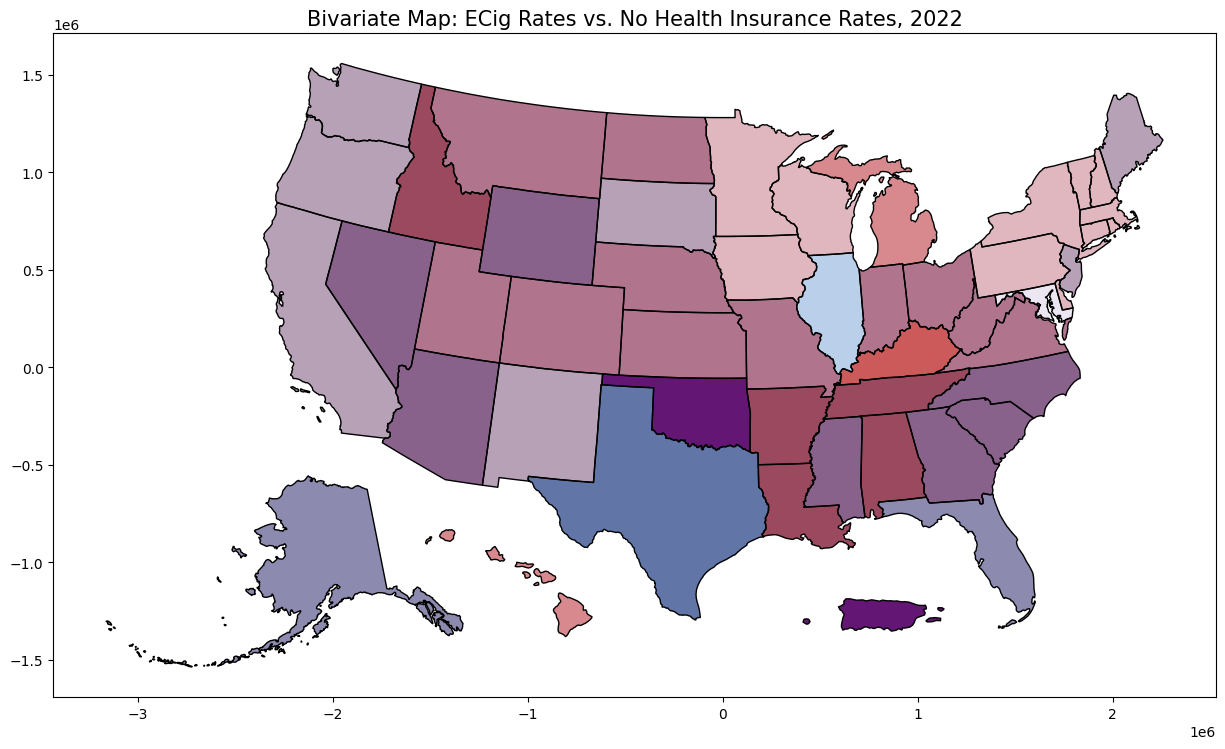

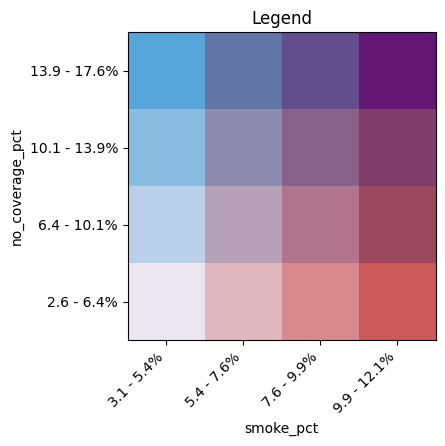

In [100]:
# Custom quantization boundaries
ecig_bins = [min_ecig, 5.35, 7.6, 9.85, max_ecig]
no_coverage_bins = [min_no_coverage, 6.35, 10.1, 13.85, max_no_coverage]

# Custom 4x4 color matrix for bivariate colors
color_matrix = np.array([
    ["#ece6f2", "#bacfea", "#89bbe0", "#58a5d9"],
    ["#e0b7bf", "#b7a1b6", "#8c8aaf", "#6175a7"],
    ["#d8898d", "#b0748d", "#88628b", "#624e8d"],
    ["#cc5a5a", "#9b495f", "#7f3c6a", "#631674"]
])

# Call the function
create_bivariate_choropleth(ecig_hi_data, 'smoke_pct', 'no_coverage_pct', ecig_bins, no_coverage_bins, color_matrix, map_title='Bivariate Map: ECig Rates vs. No Health Insurance Rates, 2022')

## ECig x Poverty Line

In [101]:
ecig_poverty_data = ecig_data[ecig_data['Year'] == 2022].merge(poverty_data, how='left', left_on='State', right_on='state_abbr')
ecig_poverty_data.head()

,Year,State,smoke_pct,dont_smoke_pct,state,total_population,total_surveyed,below_poverty_level,pct_below,above_poverty_level,state_fips,state_abbr
0,2022,AK,6.8,93.2,Alaska,734821.0,717293.0,75227.0,10.487625,642066.0,2.0,AK
1,2022,AL,10.4,89.6,Alabama,5028092.0,4890427.0,768897.0,15.722492,4121530.0,1.0,AL
2,2022,AR,10.4,89.7,Arkansas,3018669.0,2931377.0,475729.0,16.228858,2455648.0,5.0,AR
3,2022,AZ,9.0,91.0,Arizona,7172282.0,7017776.0,916876.0,13.065051,6100900.0,4.0,AZ
4,2022,CA,7.2,92.8,California,39356104.0,38643585.0,4685272.0,12.124320,33958313.0,6.0,CA


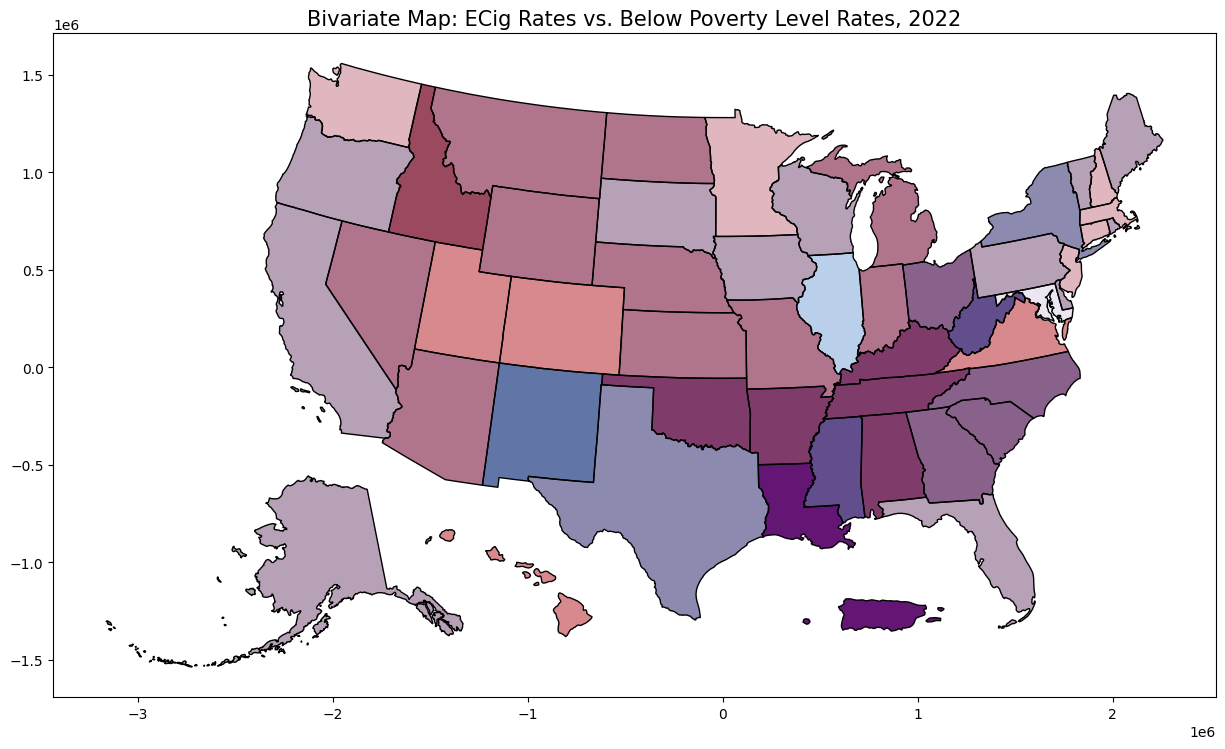

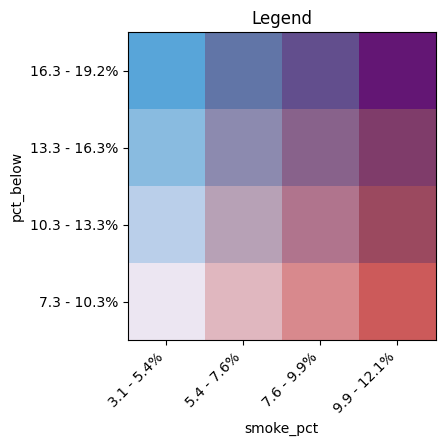

In [103]:
# Custom quantization boundaries
ecig_bins = [min_ecig, 5.35, 7.6, 9.85, max_ecig]
poverty_bins = [min_poverty, 10.3, 13.3, 16.3, max_poverty]

# Custom 4x4 color matrix for bivariate colors
color_matrix = np.array([
    ["#ece6f2", "#bacfea", "#89bbe0", "#58a5d9"],
    ["#e0b7bf", "#b7a1b6", "#8c8aaf", "#6175a7"],
    ["#d8898d", "#b0748d", "#88628b", "#624e8d"],
    ["#cc5a5a", "#9b495f", "#7f3c6a", "#631674"]
])

# Call the function
create_bivariate_choropleth(ecig_poverty_data, 'smoke_pct', 'pct_below', ecig_bins, poverty_bins, color_matrix, map_title='Bivariate Map: ECig Rates vs. Below Poverty Level Rates, 2022')

# Working Tests From Pygris Website

In [4]:
from pygris import counties
import matplotlib.pyplot as plt

Using the default year of 2021
Using FIPS code '26' for input 'MI'
Using the default year of 2021
Using FIPS code '26' for input 'MI'


Text(0.5, 1.0, 'Cartographic')

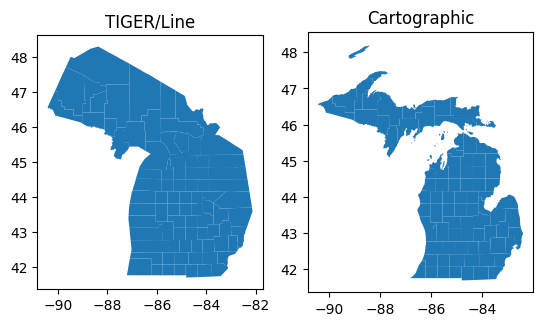

In [5]:
# Get the default TIGER/Line file for counties in Michigan
mi_tiger = counties(state = "MI", cache = True)

# Get the cartographic boundary file with cb = True
mi_cartographic = counties(state = "MI", cb = True, cache = True)

# Plot the two side-by-side to compare them
fig, ax = plt.subplots(ncols = 2)
mi_tiger.plot(ax = ax[0])
mi_cartographic.plot(ax = ax[1])

ax[0].set_title("TIGER/Line")
ax[1].set_title("Cartographic")

In [6]:
from pygris.data import get_census

us_youth_sahie = get_census(dataset = "timeseries/healthins/sahie",
                            variables = "PCTUI_PT",
                            params = {
                                "for": "county:*",
                                "in": "state:*",
                                "time": 2019,
                                "AGECAT": 4
                            }, 
                            return_geoid = True, 
                            guess_dtypes = True)

Text(0.5, 1.0, '% uninsured under age 19 by county, 2019')

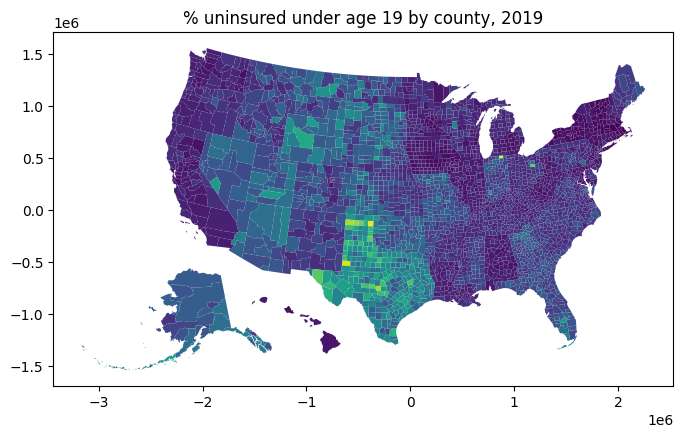

In [7]:
from pygris import counties
from pygris.utils import shift_geometry
from matplotlib import pyplot as plt

us_counties = counties(cb = True, resolution = "20m", cache = True, year = 2019)
us_counties_rescaled = shift_geometry(us_counties)

us_counties_merged = us_counties_rescaled.merge(us_youth_sahie, on = "GEOID")

us_counties_merged.plot(
    column = "PCTUI_PT",
    cmap = "viridis",
    figsize = (8, 6)
)

plt.title("% uninsured under age 19 by county, 2019")

# Misc Stuff

In [14]:
# Load the Natural Earth data (update the path to where you downloaded the file)
shapefile_path = 'ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp'
states = gpd.read_file(shapefile_path)

# # Filter for US states
#states = states[(states['CONTINENT'] == 'North America') & (states['NAME'] == 'United States')]

states

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.0595 49.00..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.9678 47.95..."
5,Admin-1 scale rank,2,USA-3519,3519,US-WA,http://en.wikipedia.org/wiki/Washington_(state),US,6,Washington,WA|Wash.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-117.03143 48.99931, -117.02665 47.7..."
6,Admin-1 scale rank,2,USA-3520,3520,US-AZ,http://en.wikipedia.org/wiki/Arizona,US,1,Arizona,AZ|Ariz.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-109.04522 36.99991, -109.04367 31.3..."
7,Admin-1 scale rank,2,USA-3521,3521,US-CA,http://en.wikipedia.org/wiki/California,US,8,California,CA|Calif.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-114.64222 35.05311, -114.62212 34.9..."
8,Admin-1 scale rank,2,USA-3522,3522,US-CO,http://en.wikipedia.org/wiki/Colorado,US,1,Colorado,CO|Colo.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-102.05017 40.00081, -102.04012 38.4..."
9,Admin-1 scale rank,2,USA-3523,3523,US-NV,http://en.wikipedia.org/wiki/Nevada,US,1,Nevada,NV|Nev.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-117.02825 42.00002, -114.03422 41.9..."


In [16]:
# Load state geometries
# states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# states = states[(states['continent'] == 'North America') & (states['name'] == 'United States')]

# Match state names to your data (assuming states in your data are named according to the 'state' column)
us_states = gpd.read_file('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')
us_states['state'] = us_states['name']

us_states.head()


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>